# College Scorecard: Data Story
How do you create a data story? You’ve learned the basics, but the information is probably a bit abstract at this point. Keep in mind that storytelling is an art, so you have to get your imagination bubbling. In this project, you’ll learn some pointers to get those creative juices flowing. In the following sections, we’ll work step-by-step to create your first data story. 

In [48]:
## Imports ##
#############
from os import getcwd, path, listdir

import numpy as np
from pandas import DataFrame, Timestamp, Series, read_csv, concat, option_context, merge

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import Markdown, HTML, FileLink



In [2]:
## File Pathing ##
##################

#Dataset was collected using included api_call.py file: https://github.com/jeffreysanglin/springboard/blob/master/api_call.py

LOCAL_DIR = getcwd()
DATA_PATH = path.join(LOCAL_DIR, 'data','scorecard','cap1_api_data.csv')

DF = read_csv(DATA_PATH, low_memory=False)


In [3]:
## UDF's ##
###########

def display_all(df,max_rows=1000,max_columns=1000):
    """Display a data frame within a pandas option context.
	
    Parameters
    ----------
	max_rows : int
	    The maximum number of rows to display.

	max_columns : int
	    The maximum number of columns to display.
    """
    with option_context("display.max_rows", max_rows, "display.max_columns", max_columns):
        display(df)

## Steps:

#### I. Ask the following questions and look for the answers using code and plots:
   #### 1. Can you count something interesting?

In [36]:
#print(DF.columns)

In [5]:
men_exc = DF.loc[:,'school.men_only']==1
wom_exc = DF.loc[:,'school.women_only']==1
hisp = DF.loc[:,'school.minority_serving.hispanic']==1
hist_black = DF.loc[:,'school.minority_serving.historically_black']==1
trb = DF.loc[:,'school.minority_serving.tribal']==1
online = DF.loc[:,'school.online_only']==1
relig = DF.loc[:,'school.religious_affiliation']==1
investigated = DF.loc[:,'school.under_investigation']==1

print("Count Schools:")
men_only = DF.loc[men_exc].drop('id',axis=1)
print("\t Male-exclusive: {}".format(men_only.shape[0]))
wom_only = DF.loc[wom_exc].drop('id',axis=1)
print("\t Female-exclusive: {}".format(wom_only.shape[0]))
mix_gen = DF.loc[~(men_exc|wom_exc)].drop('id',axis=1)
print("\t Neither Male/Female exclusive: {}".format(mix_gen.shape[0]))




Count Schools:
	 Male-exclusive: 65
	 Female-exclusive: 39
	 Neither Male/Female exclusive: 6971


#### Answer
Less than 2% of schools in our dataset are gender exclusive. ~1% of schools are men-only and 0.5% are women-only.

   #### 2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

In [6]:
desc = DF.describe()
earn_desc = desc.loc[:,'latest.earnings.7_yrs_after_entry.mean_earnings']

prt_str = 'Earnings 7 Yrs after Entry: \n\t P25 - {p25} \n\t P50 - {p50} \n\t P75 - {p75}'
prt_str = prt_str.format(p25=earn_desc.loc['25%'], p50=earn_desc.loc['50%'], p75=earn_desc.loc['75%'])
print(prt_str)

#display_all(desc.loc[:,'latest.earnings.7_yrs_after_entry.mean_earnings'])

Earnings 7 Yrs after Entry: 
	 P25 - 24900.0 
	 P50 - 30700.0 
	 P75 - 38500.0


#### Answer
Only 25% of schools saw their average graduate earning $38k or more


   #### 3. Can you make a bar plot or a histogram?

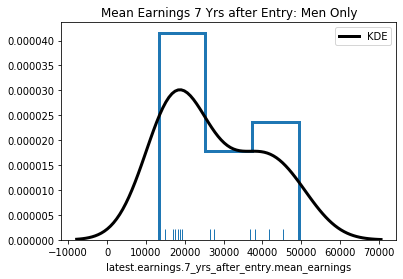

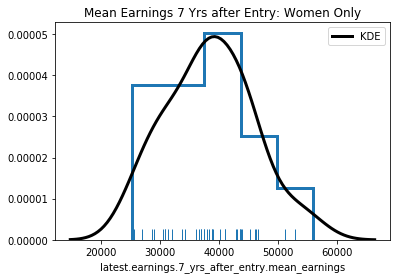

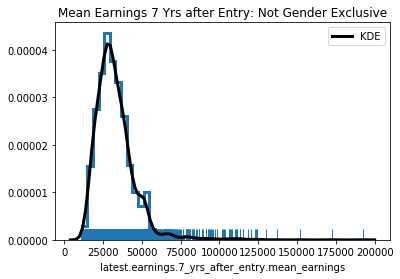

In [7]:
earn7_col = 'latest.earnings.7_yrs_after_entry.mean_earnings'

for key,df in {'Men Only':men_only, 'Women Only':wom_only, 'Not Gender Exclusive':mix_gen}.items():
    plt_df = df.loc[df.loc[:,earn7_col].notnull()].loc[:,earn7_col].copy()
    sns.distplot(plt_df, kde=True,rug=True,
                    kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                    hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1}
                )
    plt.title('Mean Earnings 7 Yrs after Entry: {}'.format(key))
    plt.show()

#### Answer
Interestingly enough (perhaps due to small sample size), the distribution of mean earnings for exclusively male schools is bi-modal. The group of schools with lower earnings are grouped under \\$20k with a second group closer to \\$40k mean earnings.

Surprisingly, some schools' mean earnings are > \\$100k.

   #### 4. Can you compare two related quantities?

In [37]:
men_only_mn = men_only.mean()
wom_only_mn = wom_only.mean()
mix_gen_mn = mix_gen.mean()


#comparison = merge(men_only,wom_only, how='inner', left_index=True,right_index=True)
comp = concat([men_only_mn,wom_only_mn,mix_gen_mn],axis=1)
comp.columns = ['men_only','wom_only','mixed_gender']
earn_compar = comp.loc[earn7_col,:]

In [9]:
display(comp.loc[earn7_col,:])

men_only        27450.000000
wom_only        38476.923077
mixed_gender    33090.503716
Name: latest.earnings.7_yrs_after_entry.mean_earnings, dtype: float64

#### Answer
The mean earnings for graduates from women only schools ($38k) was higher than men only or mixed gender schools.

   #### 5. Can you make a scatterplot?

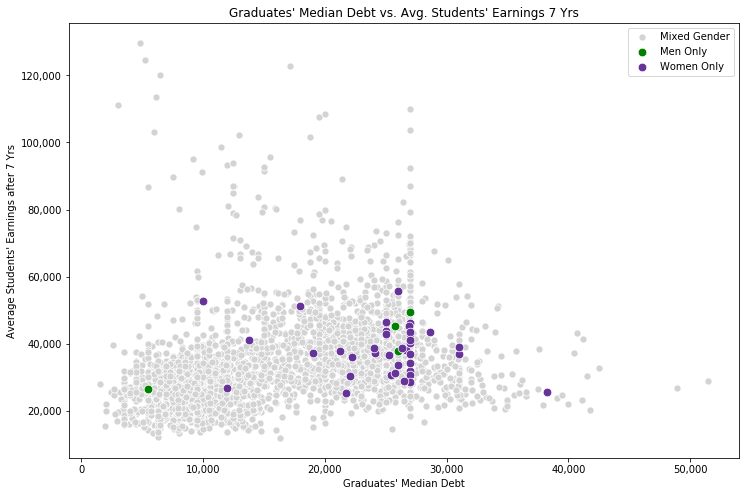

In [35]:
debt_col = 'latest.aid.median_debt.completers.overall'
point_size=75

#Make a scatter comparing debt with earnings
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=debt_col, y=earn7_col, data=mix_gen, color='lightgray',alpha=1,s=point_size/1.5)
ax = sns.scatterplot(x=debt_col, y=earn7_col, data=men_only, color='green',s=point_size)
ax = sns.scatterplot(x=debt_col, y=earn7_col, data=wom_only, color='rebeccapurple',s=point_size)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel("Graduates' Median Debt")
plt.ylabel("Average Students' Earnings after 7 Yrs")
plt.title("Graduates' Median Debt vs. Avg. Students' Earnings 7 Yrs")
plt.legend(('Mixed Gender','Men Only','Women Only'))
plt.show()

#### Answer
Based on this scatter plot, some correlation between Median Debt and Student earnings does exist.

   #### 6. Can you make a time-series plot?

#### Answer

#### II. Looking at the plots, what are some insights you can make? 
Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

#### Answer
In the above scatter plot, there does seem to be some correlation between debt and earnings for schools. I imagine this may be related to specific fields of study that both cost more and have higher earning potential (e.g. medical professions).

Some outstanding questions:
- Why do students of women-only institutions have higher mean earnings than either exclusively male or non-gender-exclusive schools? Does the gender-pay gap disappear if we isolate for similar courses of study?
- Do schools that historically serve minority groups also see a difference in earnings over other schools?
- Are there other valuable outcomes (besides earnings) for students from attending a course of study?

#### III. Now that you’ve asked questions, hopefully you’ve found some interesting insights. 
Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

#### Answer
When choosing a school, students may consider a variety of factors in their decision. If a student is concerned primarily with earnings, however, is there any difference between gender exclusive schools and non-gender-exclusive schools?

In the most recent college scorecard, only 25% of schools saw their average graduate earning $38k or more.

When we look at a cross-section of schools based on gender exclusivity, we see some difference between these three groups in earnings:

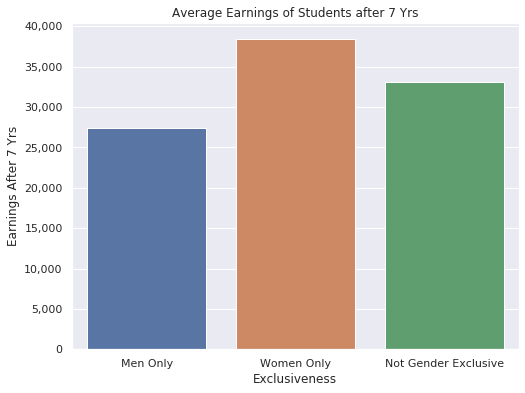

In [57]:

cat_names = ['Men Only','Women Only','Not Gender Exclusive']
comp_bar = DataFrame(earn_compar.values, cat_names).reset_index()
comp_bar.columns = ['Exclusiveness','Earnings After 7 Yrs']



plt.figure(figsize=(8,6))
ax = sns.barplot(x="Exclusiveness",y="Earnings After 7 Yrs",data=comp_bar)
plt.title('Average Earnings of Students after 7 Yrs')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

Some of the difference may be due to the types of programs offered at gender exclusive schools vs. those that are not. 

And while it's tempting to assume that those who attend a women-exclusive school will largely earn more than those students who don't, it's helpful to remember that there are over 6k secondary schools in the US. As seen below, the average earnings of these schools can be quite diverse.

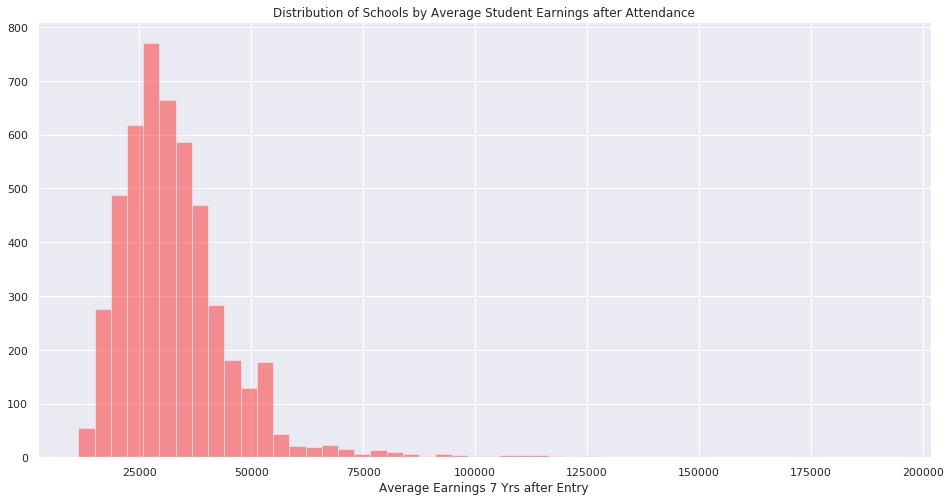

In [69]:
plt.figure(figsize=(16,8))
dist_df = DF.loc[DF.loc[:,earn7_col].notnull()].loc[:,earn7_col]
ax = sns.distplot(dist_df, kde=False, rug=False, color='red')
plt.title('Distribution of Schools by Average Student Earnings after Attendance')
plt.xlabel('Average Earnings 7 Yrs after Entry')
plt.show()